In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurment = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session=Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
recent_date = session.query(Measurment.date).order_by(Measurment.date.desc()).first()
recent_date

('2017-08-23',)

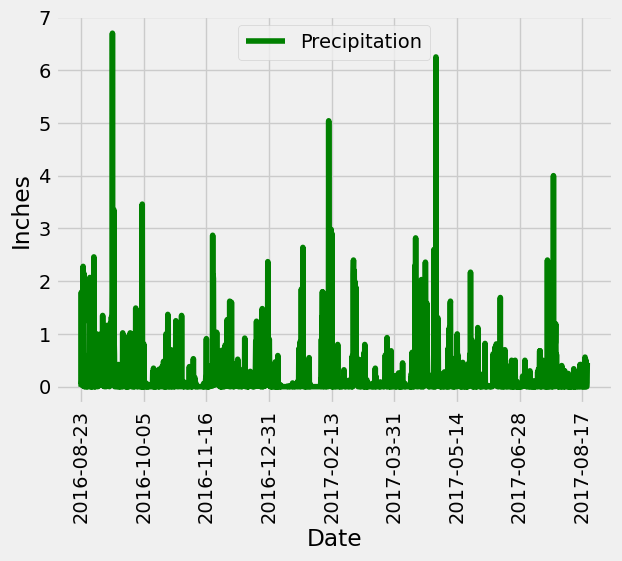

<Figure size 640x480 with 0 Axes>

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
precipitation_data = session.query(Measurment.date, Measurment.prcp).filter(Measurment.date >= "2016-08-23").filter(Measurment.date <= "2017-08-23").all()


# Perform a query to retrieve the data and precipitation scores

precipitation_data
# Save the query results as a Pandas DataFrame. Explicitly set the column names

precipitation_df = pd.DataFrame(precipitation_data, columns=['Date','Precipitation'])

# Sort the dataframe by date
precipitation_df = pd.DataFrame(precipitation_data, columns=['Date','Precipitation'])

# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df = precipitation_df.sort_values(by='Date').dropna()
precipitation_df

precipitation_df.plot(x='Date', y='Precipitation', rot=90, color='g')
plt.ylabel('Inches')
plt.show()

plt.savefig('precipitaion.png')


In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
Total_Station = session.query(Station.id).count()
Total_Station

9

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
Active_Stations = session.query(Measurment.station, func.count(Measurment.station)).group_by(Measurment.station).order_by(func.count(Measurment.station).desc()).all()
Active_Stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station_number = 'USC00519281'
session.query(func.min(Measurment.tobs),
              func.max(Measurment.tobs),
              func.avg(Measurment.tobs)).filter(Measurment.station == most_active_station_number).all()

[(54.0, 85.0, 71.66378066378067)]

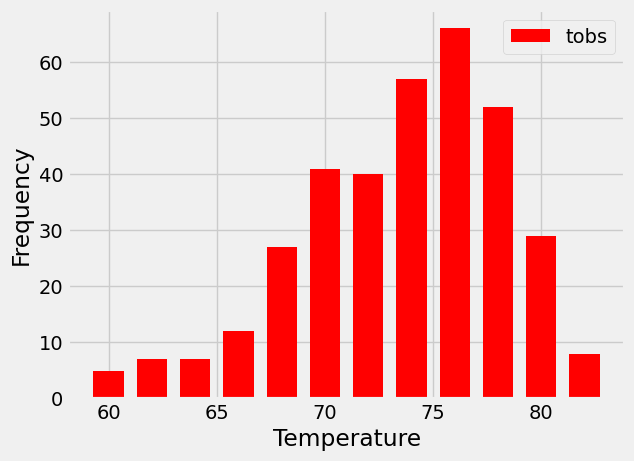

In [17]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_highest_observation = Active_Stations[0][0]

results = session.query(Measurment.date, Measurment.tobs).\
                        filter(Measurment.date >= "2016-08-24").\
                        filter(Measurment.date <= "2017-08-23").\
                        filter(Measurment.station == station_highest_observation).all()

results_df = pd.DataFrame(results)

results_df.plot.hist (bins=12, rwidth=0.7,color='r')
plt.ylabel('Frequency')
plt.xlabel('Temperature')

plt.savefig('Temperature.png')

# Close Session

In [16]:
# Close Session
session.close()